In [108]:
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## 数字mnist

In [2]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
28*28*512+512

401920

In [38]:
512*10+10

5130

In [13]:
x = np.zeros(28*28)
x = x.reshape(1,-1)
x.shape

(1, 784)

In [14]:
y = model.predict(x)

In [15]:
y

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)

In [16]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [21]:
from keras.utils import to_categorical
# onehot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels.shape

(60000, 10)

In [23]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2571 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.1045 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0692 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0494 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0379 - acc: 0.9886


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 34us/step
test_acc: 0.9782


In [30]:
x = test_images[10]
x = x.reshape(1,-1)

In [31]:
y = model.predict(x)

In [32]:
y

array([[9.9999011e-01, 1.2742126e-11, 9.8437249e-06, 3.6263093e-11,
        6.6387230e-14, 5.0883227e-09, 6.8091484e-09, 1.9896353e-08,
        3.3256960e-11, 1.3551014e-08]], dtype=float32)

In [33]:
np.argmax(y)

0

In [34]:
test_labels[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [41]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [43]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2465 - acc: 0.9246
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.1022 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0727 - acc: 0.9776
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0575 - acc: 0.9822
Epoch 5/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0478 - acc: 0.9857


In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 45us/step
test_acc: 0.9797


## 电影评论
1. 要多少层网络
2. 每层要多少个hidden units

In [46]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [47]:
train_data.shape

(25000,)

In [48]:
train_labels.shape

(25000,)

In [49]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [50]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [51]:
len(train_data[0])

218

In [52]:
len(train_data[1])

189

In [53]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [55]:
len(x_train[0])

10000

In [56]:
len(x_train[1])

10000

In [57]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [58]:
y_train.shape

(25000,)

In [61]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import losses
from keras import metrics
from keras import optimizers


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [62]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [63]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.5235 - binary_accuracy: 0.7741 - val_loss: 0.3958 - val_binary_accuracy: 0.8606
Epoch 2/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.3145 - binary_accuracy: 0.8995 - val_loss: 0.3115 - val_binary_accuracy: 0.8854
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2309 - binary_accuracy: 0.9261 - val_loss: 0.3008 - val_binary_accuracy: 0.8806
Epoch 4/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1820 - binary_accuracy: 0.9430 - val_loss: 0.2786 - val_binary_accuracy: 0.8880
Epoch 5/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1480 - binary_accuracy: 0.9540 - val_loss: 0.2773 - val_binary_accuracy: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1210 - binary_accuracy: 0.9630 - val_loss: 0.3101 - val_bi

In [64]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

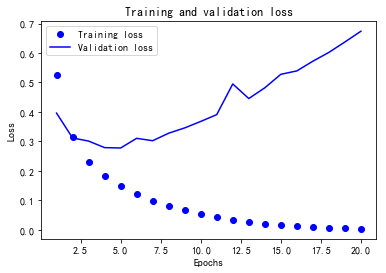

In [66]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

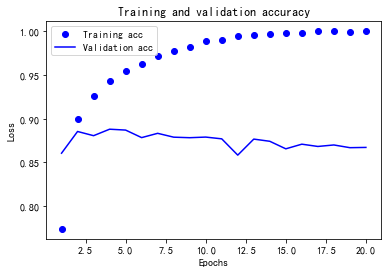

In [67]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [68]:
# 因为val loss在4个epoch处，就开始上涨了，所以我们在4处停止
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.2659 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.1983 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 3s 104us/step


In [69]:
results

[0.3244994094371796, 0.87312]

In [70]:
x_test.shape

(25000, 10000)

In [72]:
model.predict(x_test[0].reshape(1,-1))

array([[0.14235812]], dtype=float32)

In [102]:
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model.fit(data, labels)  # starts training

In [103]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

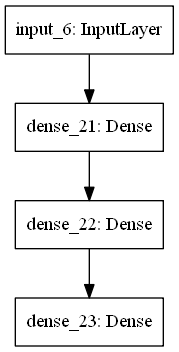

In [109]:
Image.open('model.png')

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [75]:
x = Input(shape=(784,))
# This works, and returns the 10-way softmax we defined above.
y = model(x)

In [81]:
x = np.random.rand(784)
x = x.reshape(1,-1)
y = model.predict(x)

In [82]:
y.shape

(1, 10)

In [88]:
from keras.layers import TimeDistributed

# Input tensor for sequences of 20 timesteps,
# each containing a 784-dimensional vector
input_sequences = Input(shape=(20, 784))

# This applies our previous model to every timestep in the input sequences.
# the output of the previous model was a 10-way softmax,
# so the output of the layer below will be a sequence of 20 vectors of size 10.
processed_sequences = TimeDistributed(model)(input_sequences)
model = Model(input_sequences, processed_sequences)

In [91]:
x = np.random.rand(20,784)
x.shape
x = x.reshape(1,20,-1)

In [92]:
y = model.predict(x)

In [93]:
y.shape

(1, 20, 10)

In [101]:
import keras
keras.losses.hinge??